In [84]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris


data = load_iris()
data = pd.DataFrame(data['data'], columns=data['feature_names']).iloc[:, 3]
print(data)
print(data.describe())

k = 3 # 分成k个盒子

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal width (cm), Length: 150, dtype: float64
count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal width (cm), dtype: float64


In [85]:
"""
等宽离散化，各个类别依次命名为0,1,...,k-1
"""
d1 = pd.cut(data, k, labels = range(k)) 
d1

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: petal width (cm), Length: 150, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [86]:
"""
等频率离散化
"""
w = [1.0*i/k for i in range(k+1)]
#使用describe函数自动计算分位数
w = data.describe(percentiles = w)
if (k % 2) != 0:
    w.drop(labels=['50%'], inplace=True)
w = w.iloc[4: 4+k+1]
w[0] = w[0] * (1-1e-10) # cut边界左开右闭
# w[-1] = w[-1] * (1+1e-10)
print(w)
print("#"*50)
d2 = pd.cut(data, w, labels = range(k))
d2
# data.describe()

0%       0.100000
33.3%    0.866667
66.7%    1.600000
100%     2.500000
Name: petal width (cm), dtype: float64
##################################################


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: petal width (cm), Length: 150, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [87]:
"""
聚类离散化
"""
from sklearn.cluster import KMeans


kmodel = KMeans(n_clusters = k).fit(data.values.reshape(-1, 1))
c = pd.DataFrame(kmodel.cluster_centers_).sort_values(by=0) # 输出聚类中心，并且排序
print(c)
w = c.rolling(2).mean().iloc[1:] #相邻两项求中点，作为边界点
print("#"*50)
print(w)
w = [0] + list(w[0]) + [data.max()] #加上首末边界点
print(w)
print("#"*50)
d3 = pd.cut(data, w, labels = range(k))
d3

          0
0  0.246000
2  1.323077
1  2.058333
##################################################
          0
2  0.784538
1  1.690705
[0, 0.7845384615384616, 1.6907051282051282, 2.5]
##################################################


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: petal width (cm), Length: 150, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [88]:
data.values.copy().sort()

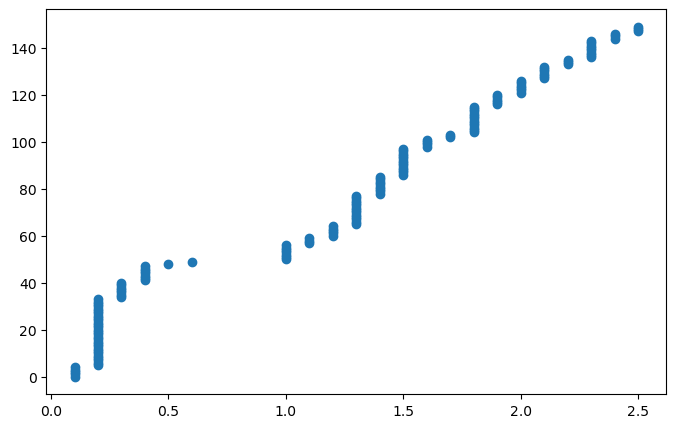

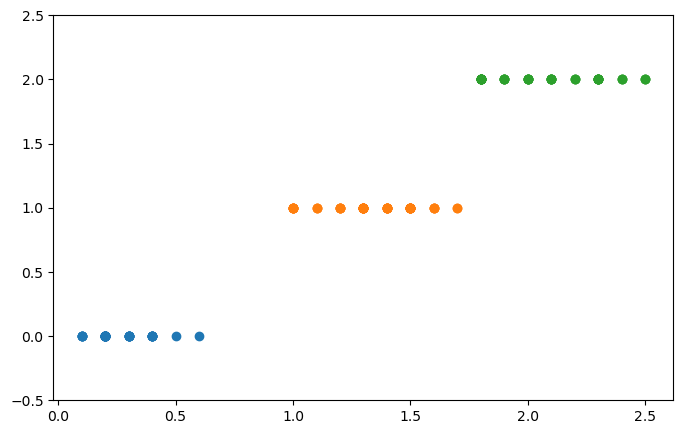

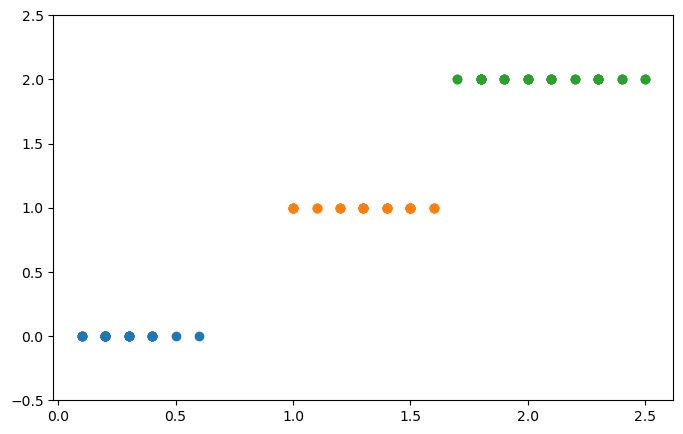

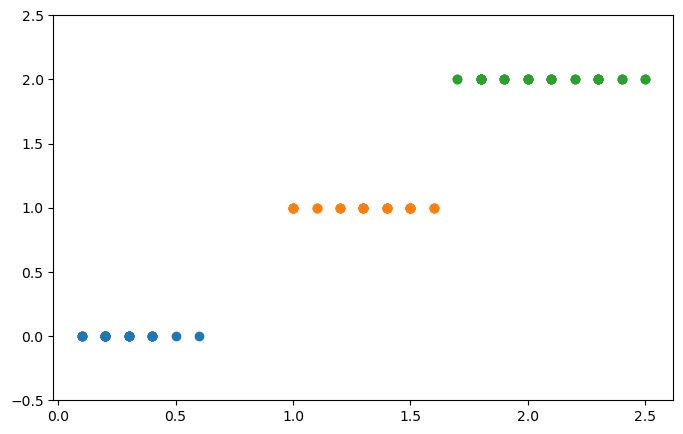

In [89]:
import matplotlib.pyplot as plt


def cluster_plot(d, k): 
    plt.figure(figsize = (8, 5))
    for j in range(0, k):
        plt.plot(data[d==j], [j for i in d[d==j]], 'o') # 横坐标为数值，纵坐标为类别
    plt.ylim(-0.5, k-0.5)
    return plt

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(np.sort(data.values), range(data.shape[0]), 'o')
cluster_plot(d1, k).show() # 等宽
cluster_plot(d2, k).show() # 等频
cluster_plot(d3, k).show() # 聚类